<div align="right">
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
</div>

<center> 
    <h1>Introducción a la Visión Computacional</h1>
    <h1>Tarea 1</h1>
</center>

### Magíster en Data Science
#### Cristhian Solís Muñoz

-----------------------
<div align="right">
Fecha de Entrega: Martes 22, Abril 2025.
</div>

<div align="center">
<h3>Proyecto Clasificación de patologías en peces de agua dulce a través de Visión Computacional 🐟</h3>
</div>

<p align="center">
  <img src="https://blog.petco.cl/wp-content/uploads/2023/10/22Acua-00.png" alt="Banner Acuicultura" width="100%" height="300">
</p>


## Resumen

Se desarrolla los primeros pasos para la generación de un proyecto ligado con visión computacional, partiendo desde la selección de una base de datos de imágenes abierta, aplicando preprocesamiento básico de las imágenes del dataset y finalizando con la definición del plan de trabajo para las siguientes etapas.

In [38]:
# Importación de librerias
import os
from PIL import Image
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Aplicación Propuesta

En esta etapa inicial, se propone el desarrollo de un clasificador de imágenes que permita identificar si un pez está sano o si presenta signos visibles de enfermedad. No obstante, se contemplan otras posibles líneas de investigación y desarrollo que podrán ser abordadas en entregas posteriores.

Esta propuesta inicial se alinea con el objetivo de explorar el potencial de la visión computacional como herramienta de apoyo en la detección temprana de enfermedades, contribuyendo así a la mejora del bienestar animal y la eficiencia productiva en la industria acuícola.

- **Objetivo**: Clasificar la condición sanitaria de un pez.
- **Justificación**: Esta tarea es relevante en el contexto de la acuicultura, donde la detección temprana de enfermedades puede prevenir pérdidas económicas significativas y vela por el bienestar animal.
- **Impacto**: Potencial de adaptación a proyecto real en la industria chilena.

## Descripción del Dataset

En los proximos bloques, se explora el dataset obtenido medieante  [Kaggle](https://www.kaggle.com/datasets/subirbiswas19/freshwater-fish-disease-aquaculture-in-south-asia/data). Denominado **Freshwater Fish Disease Aquaculture in south asia**. 

Desde la fuente, se detalla el origen de las imagenes, las cuales, fueron recolectadas desde diversas fuentes, entre ellas el departamento de investigación de una universidad, centros acuicolas y portales en línea. Se menciona que la recopilación fue asistida por expertos en sanidad de peces, lo que garantiza la validez de las etiquetas utilizadas.

Se detallaran aspectos cómo:
- **Tamaño del dataset**
- **Clases o categorías**
- **Número de imagenes por categoria**

In [50]:
# Ruta donde están las imágenes originales
base_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\Freshwater-Fish-Disease-Aquaculture\Freshwater-Fish-Disease-Aquaculture\Data\Train'
processed_base_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\Freshwater-Fish-Disease-Aquaculture\Freshwater-Fish-Disease-Aquaculture\Data\Train_Processed'

# Crear directorio para imágenes procesadas si no existe
if not os.path.exists(processed_base_path):
    os.makedirs(processed_base_path)

# Listar clases (subcarpetas)
clases = os.listdir(base_path)
clases_processed = os.listdir(processed_base_path)

In [ ]:

# Listar clases (subcarpetas)
clases = os.listdir(base_path)

# Lista para almacenar metadata
metadata = []

# Recorrer carpetas/clases
for clase in clases:
    clase_path = os.path.join(base_path, clase)
    for nombre_img in os.listdir(clase_path):
        ruta_img = os.path.join(clase_path, nombre_img)
        try:
            with Image.open(ruta_img) as img:
                formato = img.format
                ancho, alto = img.size
                metadata.append({
                    'clase': clase,
                    'archivo': nombre_img,
                    'formato': formato,
                    'ancho': ancho,
                    'alto': alto
                })
        except Exception as e:
            print(f"Error al leer {ruta_img}: {e}")

# Crear DataFrame
df_metadata = pd.DataFrame(metadata)


In [29]:
# Recorrer las clases y obtener metadata
metadata = []

# Ruta base donde están las imágenes
base_path = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Desktop\Freshwater-Fish-Disease-Aquaculture\Freshwater-Fish-Disease-Aquaculture\Data\Train'

# Listar clases (subcarpetas)
clases = os.listdir(base_path)

# Recorrer las carpetas/clases
for clase in clases:
    clase_path = os.path.join(base_path, clase)
    for nombre_img in os.listdir(clase_path):
        ruta_img = os.path.join(clase_path, nombre_img)
        try:
            with Image.open(ruta_img) as img:
                formato = img.format
                ancho, alto = img.size
                modo_color = img.mode  # RGB, L, etc.
                shape = img.size + (3,) if modo_color == 'RGB' else img.size + (1,)  # Agregar canal de color
                metadata.append({
                    'clase': clase,
                    'archivo': nombre_img,
                    'formato': formato,
                    'ancho': ancho,
                    'alto': alto,
                    'modo_color': modo_color,
                    'shape': shape
                })
        except Exception as e:
            print(f"Error al leer {ruta_img}: {e}")

# Crear DataFrame con la metadata
df_metadata = pd.DataFrame(metadata)

In [3]:
# ¿Cual es el tamaño del dataset?
total_imagenes = len(df_metadata)
print(f"Total de archivos: {total_imagenes}")

Total de archivos: 1750


In [4]:
# ¿Cuantas clases existen?
clases_unicas = df_metadata['clase'].unique().tolist()
print(f"Clases detectadas: {clases_unicas}")

Clases detectadas: ['Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Bacterial Red disease', 'Fungal diseases Saprolegniasis', 'Healthy Fish', 'Parasitic diseases', 'Viral diseases White tail disease']


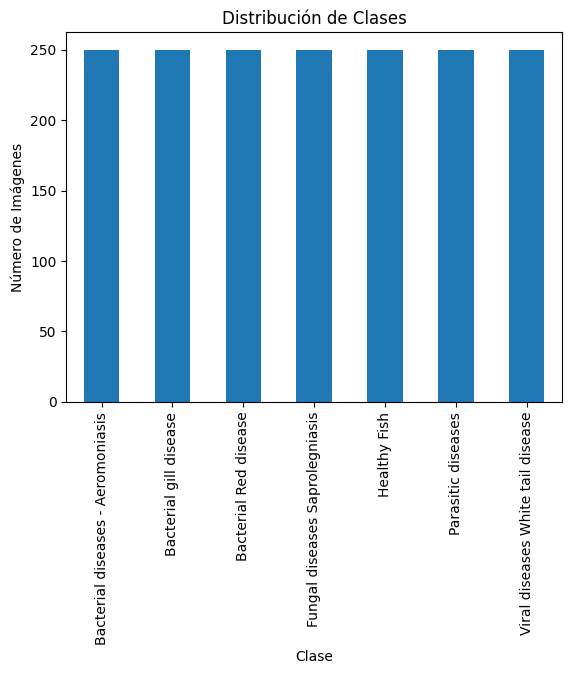


Cantidad por clase:
                               clase  cantidad
0  Bacterial diseases - Aeromoniasis       250
1             Bacterial gill disease       250
2              Bacterial Red disease       250
3     Fungal diseases Saprolegniasis       250
4                       Healthy Fish       250
5                 Parasitic diseases       250
6  Viral diseases White tail disease       250


In [12]:
# ¿Cuantas imagenes existen por clase?
conteo_por_clase = df_metadata['clase'].value_counts().rename_axis('clase').reset_index(name='cantidad')
df_metadata['clase'].value_counts().plot(kind='bar', title='Distribución de Clases', xlabel='Clase', ylabel='Número de Imágenes')
plt.show()
print("\nCantidad por clase:")
print(conteo_por_clase)

In [ ]:
# ¿Que tipo de archivo contiene?
print("\nTipos de formato de imagen:")
print(df_metadata['formato'].value_counts())
print("\n-----")


Tipos de formato de imagen:
formato
JPEG    1718
PNG       29
WEBP       3
Name: count, dtype: int64

-----


In [7]:
# ¿Tamaños más comunes?
print("\nTamaños más frecuentes:")
print(df_metadata.groupby(['ancho', 'alto']).size().sort_values(ascending=False).head(5))


Tamaños más frecuentes:
ancho  alto
128    128     1291
224    224      449
184    136        1
116    212        1
224    62         1
dtype: int64


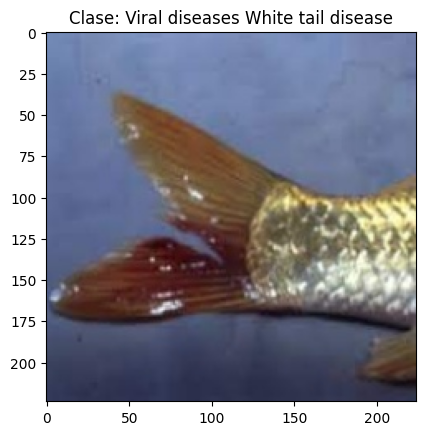

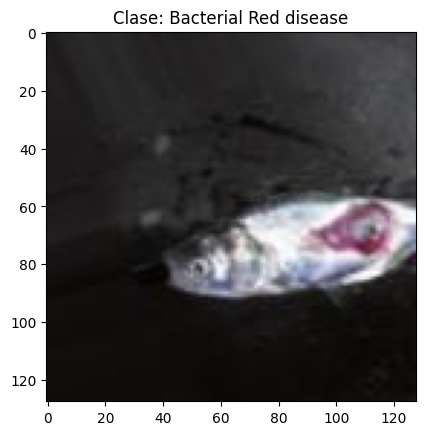

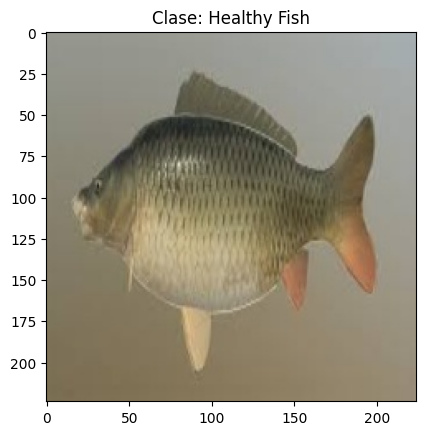

In [26]:
# Obtener una muestra aleatoria de 3 imágenes
for img_name in random.sample(df_metadata['archivo'].tolist(), 3):
    img_path = os.path.join(base_path, df_metadata.loc[df_metadata['archivo'] == img_name, 'clase'].values[0], img_name)
    
    try:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"Clase: {df_metadata.loc[df_metadata['archivo'] == img_name, 'clase'].values[0]}")
        plt.show()
    except FileNotFoundError:
        print(f"Imagen no encontrada: {img_path}")


In [30]:
# ¿Cuáles son las dimensiones (shape) de las imágenes?
print("\nDimensiones (shape) de las imágenes:")
# Contar las combinaciones de ancho, alto y modo de color
print(df_metadata['shape'].value_counts())
print("\n-----")


Dimensiones (shape) de las imágenes:
shape
(128, 128, 3)    1291
(224, 224, 3)     449
(224, 80, 3)        1
(224, 109, 3)       1
(224, 62, 3)        1
(184, 136, 3)       1
(224, 110, 3)       1
(116, 212, 3)       1
(224, 71, 3)        1
(224, 69, 3)        1
(224, 73, 3)        1
(224, 97, 3)        1
Name: count, dtype: int64

-----


In [31]:
# ¿Qué tipos de modo de color existen?
print("\nModos de color de las imágenes:")
print(df_metadata['modo_color'].value_counts())
print("\n-----")


Modos de color de las imágenes:
modo_color
RGB    1750
Name: count, dtype: int64

-----


### Pre-procesamiento Simple

- **Cambio de resolución**:
  - Función personalizada para redimensionar todas las imágenes a **256x256 píxeles**.
  - Imágenes procesadas se guardan en una nueva carpeta: `/resized`.

- **Aplicación de filtro**:
  - Filtro Gaussiano usando `cv2.GaussianBlur` para suavizar el ruido.
  - Salida guardada en una carpeta nueva: `/filtered`.

- **Visualización de ejemplos**:
  - Se mostrarán entre **4 a 6 imágenes** comparando el estado original con las versiones preprocesadas.


In [39]:
# Función para redimensionar la imagen y convertirla a RGB
def redimenzionar_y_formato(image_path):
    img = Image.open(image_path)
    img_resized = img.convert('RGB').resize((256, 256))  # Redimensionar a 256x256
    return np.array(img_resized)

# Recorrer cada clase y procesar las imágenes
for clase in clases:
    clase_path = os.path.join(base_path, clase)
    processed_clase_path = os.path.join(processed_base_path, clase)

    # Crear directorio para cada clase procesada si no existe
    if not os.path.exists(processed_clase_path):
        os.makedirs(processed_clase_path)

    # Procesar imágenes dentro de cada clase
    for nombre_img in os.listdir(clase_path):
        ruta_img = os.path.join(clase_path, nombre_img)
        
        # Solo procesar imágenes JPEG para considerar origen "productivo real" y no permitir formatos digital
        if ruta_img.lower().endswith('.jpeg') or ruta_img.lower().endswith('.jpg'):
            try:
                # Redimensionar y convertir la imagen
                img_resized = redimenzionar_y_formato(ruta_img)
                
                # Guardar imagen procesada
                processed_img_path = os.path.join(processed_clase_path, nombre_img)
                Image.fromarray(img_resized).save(processed_img_path)
                
            except Exception as e:
                print(f"Error al procesar {ruta_img}: {e}")

In [40]:
# Función para aplicar filtro gaussiano
def apply_gaussian_filter(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# Recorrer las imágenes redimensionadas y aplicar el filtro gaussiano
for clase in clases:
    clase_path = os.path.join(processed_base_path, clase)
    
    for nombre_img in os.listdir(clase_path):
        ruta_img = os.path.join(clase_path, nombre_img)
        try:
            # Cargar la imagen procesada
            img = cv2.imread(ruta_img)
            
            # Aplicar el filtro gaussiano
            img_filtered = apply_gaussian_filter(img)
            
            # Guardar la imagen procesada con el filtro
            cv2.imwrite(ruta_img, img_filtered)
        
        except Exception as e:
            print(f"Error al aplicar filtro gaussiano a {ruta_img}: {e}")

In [44]:
# Verificar si todas las clases de Train están presentes en Train_Processed
clases_train = os.listdir(base_path)
clases_processed = os.listdir(processed_base_path)

# Comprobar si todas las clases de Train están en Train_Processed
missing_classes = set(clases_train) - set(clases_processed)
if missing_classes:
    print(f"Faltan las siguientes clases en Train_Processed: {missing_classes}")
else:
    print("Todas las clases están presentes en Train_Processed.")


Todas las clases están presentes en Train_Processed.


In [45]:
# Verificar el formato de las imágenes procesadas
for clase in clases_processed:
    clase_path = os.path.join(processed_base_path, clase)
    for img_name in os.listdir(clase_path):
        img_path = os.path.join(clase_path, img_name)
        with Image.open(img_path) as img:
            if img.format != 'JPEG':
                print(f"Imagen no JPEG encontrada: {img_path}")


In [47]:
# Verificar dimensiones de las imágenes procesadas
for clase in clases_processed:
    clase_path = os.path.join(processed_base_path, clase)
    for img_name in os.listdir(clase_path):
        img_path = os.path.join(clase_path, img_name)
        with Image.open(img_path) as img:
            if img.size != (256, 256):
                print(f"Dimensiones incorrectas en la imagen: {img_path}")


In [48]:
# Verificar imágenes corruptas
for clase in clases_processed:
    clase_path = os.path.join(processed_base_path, clase)
    for img_name in os.listdir(clase_path):
        img_path = os.path.join(clase_path, img_name)
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verifica que la imagen no esté corrupta
        except (IOError, SyntaxError) as e:
            print(f"Imagen corrupta encontrada: {img_path}")


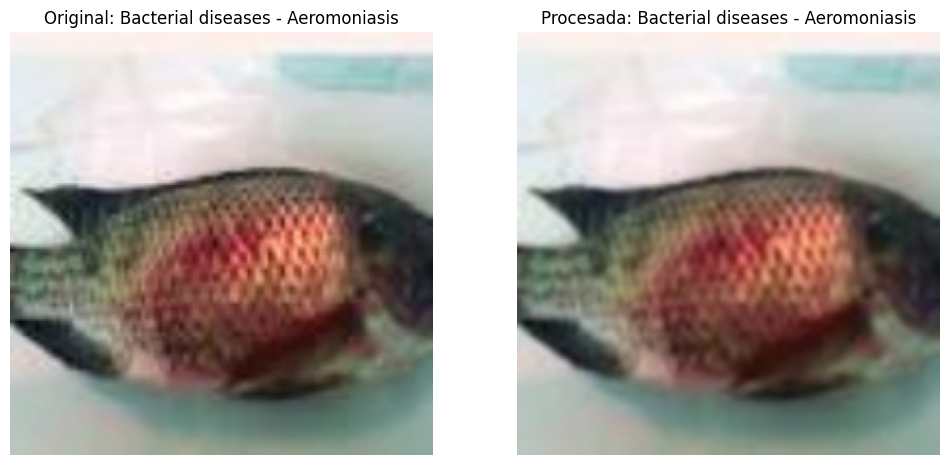

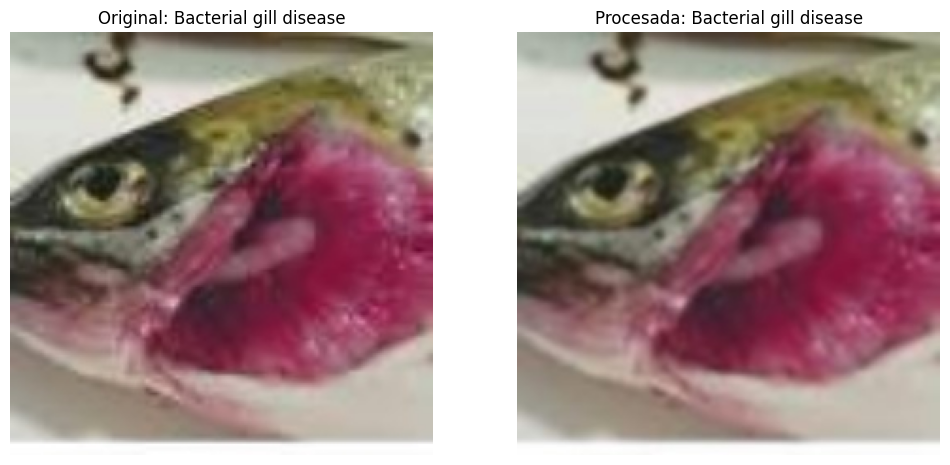

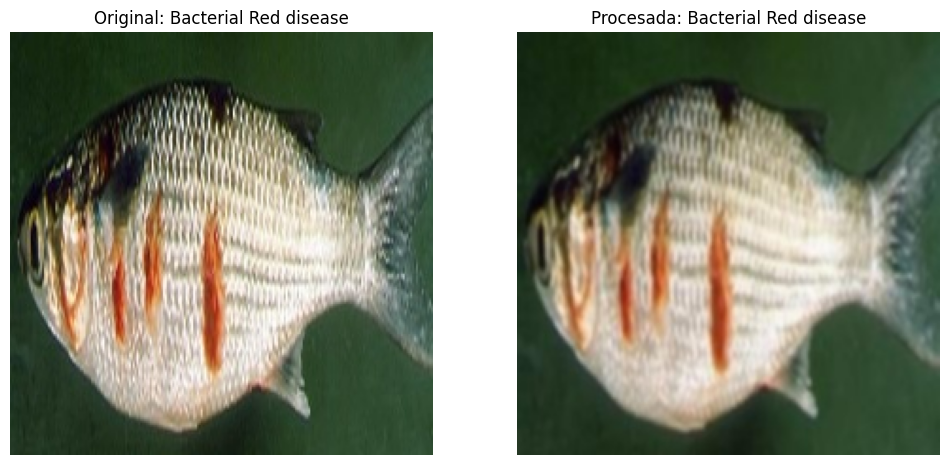

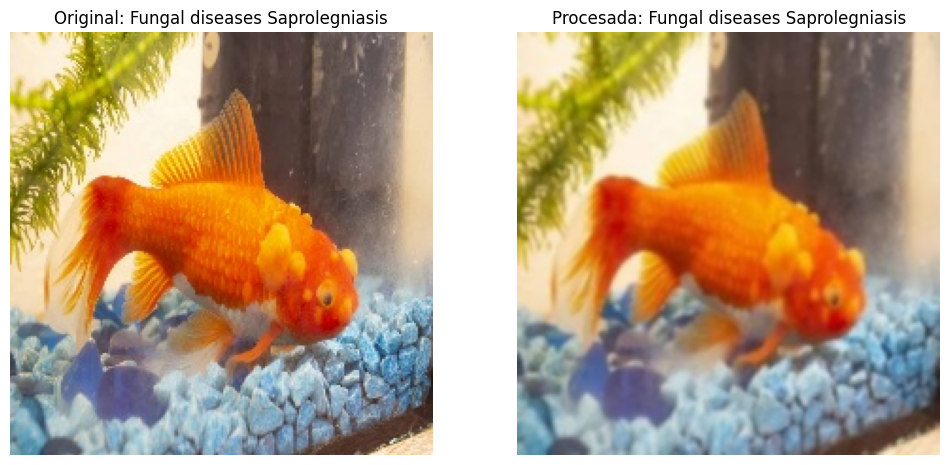

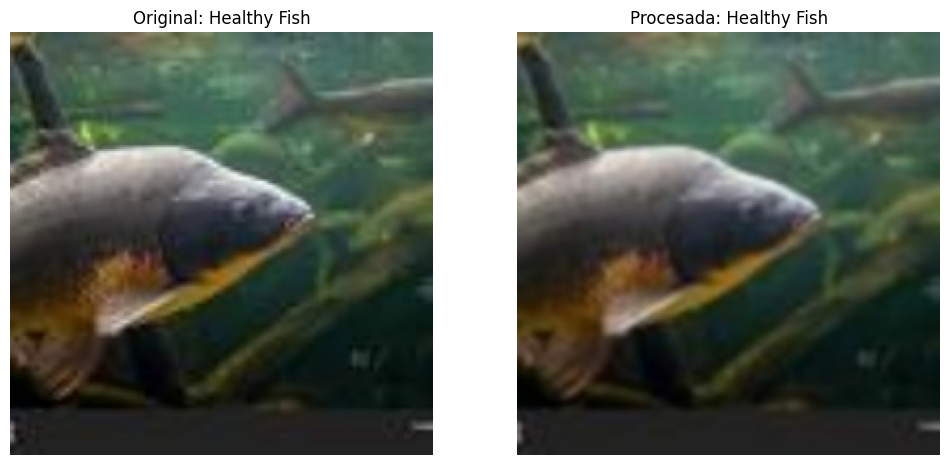

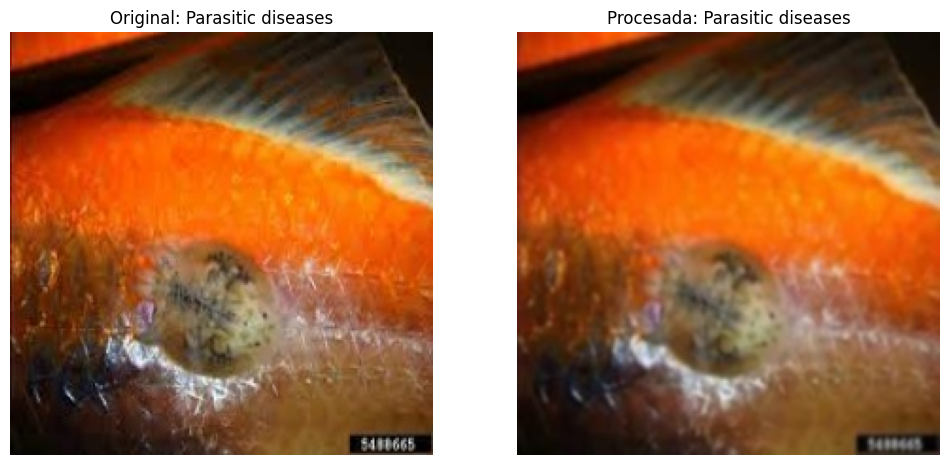

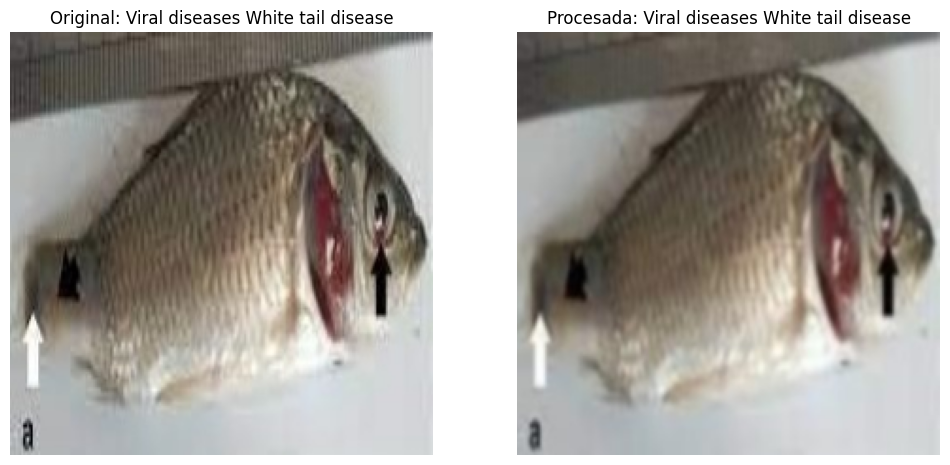

In [46]:
# Recorrer las clases para comparar una imagen de cada una
for clase in clases:
    # Elegir una imagen de la clase (usamos la primera imagen de cada clase como ejemplo)
    img_name = os.listdir(os.path.join(base_path, clase))[0]  # Tomamos la primera imagen de la clase

    # Rutas de la imagen original y procesada
    original_img_path = os.path.join(base_path, clase, img_name)
    processed_img_path = os.path.join(processed_base_path, clase, img_name)

    # Cargar imágenes original y procesada
    original_img = Image.open(original_img_path)
    processed_img = Image.open(processed_img_path)

    # Mostrar comparativa de imágenes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title(f"Original: {clase}")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(processed_img)
    plt.title(f"Procesada: {clase}")
    plt.axis('off')

    plt.show()

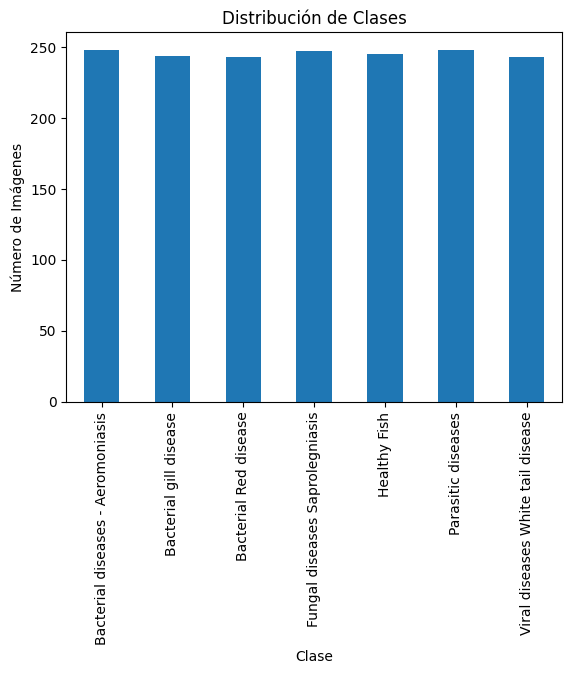


Cantidad por clase:
                               clase  cantidad
0  Bacterial diseases - Aeromoniasis       248
1             Bacterial gill disease       244
2              Bacterial Red disease       243
3     Fungal diseases Saprolegniasis       247
4                       Healthy Fish       245
5                 Parasitic diseases       248
6  Viral diseases White tail disease       243


In [51]:
# Contar imágenes por clase
conteo_por_clase = {}
for clase in clases_processed:
    clase_path = os.path.join(processed_base_path, clase)
    conteo_por_clase[clase] = len(os.listdir(clase_path))

# Convertir el conteo a un DataFrame
df_conteo = pd.DataFrame(list(conteo_por_clase.items()), columns=['clase', 'cantidad'])

# Mostrar el gráfico de distribución de clases
df_conteo.set_index('clase')['cantidad'].plot(kind='bar', title='Distribución de Clases', xlabel='Clase', ylabel='Número de Imágenes')
plt.show()

# Imprimir la cantidad por clase
print("\nCantidad por clase:")
print(df_conteo)

In [52]:
# ¿Cual es el tamaño del dataset?
total_imagenes = len(df_conteo)
print(f"Total de archivos: {total_imagenes}")

Total de archivos: 7


In [53]:
# Contar el total de imágenes en todas las clases
total_imagenes = 0
for clase in clases_processed:
    clase_path = os.path.join(processed_base_path, clase)
    total_imagenes += len(os.listdir(clase_path))

# Mostrar el total de archivos
print(f"Total de imágenes procesadas: {total_imagenes}")

Total de imágenes procesadas: 1718



### Plan Futuro (Tarea 2)